
# 0 - 데이터 준비하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Auction_master_train.csv') 


# '아파트 경매가격 예측 모델링 대회' 데이터 불러오기

In [3]:
df.isnull().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [4]:
del df['road_bunji2']
del df['road_bunji1']
del df['Specific']
del df['addr_bunji2']
del df['addr_bunji1']
del df['addr_li']

In [5]:
df.isnull().sum()

Auction_key                    0
Auction_class                  0
Bid_class                      0
Claim_price                    0
Appraisal_company              0
Appraisal_date                 0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_gross_area          0
Total_land_real_area           0
Total_land_auction_area        0
Total_building_area            0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
First_auction_date             0
Final_auction_date             0
Final_result                   0
Creditor                       0
addr_do                        0
addr_si                        0
addr_dong                      0
addr_san                       0
addr_etc                       0
Apartment_usage                0
Preserve_regist_date           0
Total_floor                    0
Current_floor                  0
Share_auction_YorN             0
road_name                      0
Close_date

In [6]:
df.describe() #데이터의 요약 통계 확인

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,16.980859,8.817900,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,9.509021,8.044644,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,3.000000,0.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,12.000000,3.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,15.000000,7.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,21.000000,12.000000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,80.000000,65.000000,37.685575,129.255872,1.515100e+10


#  #피쳐 설명

# (피쳐의 특징을 이해하는 것이 분석에 도움이 될 것 같아서 작성함)

Auction_key - > 경매 아파트 고유 키값 

Auction_class -> 경매 구분 (강제 경매 / 임의 경매)

Bid_class -> 입찰 구분 (일반 / 개별 / 일괄)	

Claim_price	-> 경매 신청인의 청구 금액

Appraisal_company -> 감정사

Appraisal_date -> 감정일자

Auction_count -> 총 경매횟수

Auction_miscarriage_count -> 총 유찰횟수

Total_land_gross_area -> 총 토지 전체면적

Total_land_real_area -> 총 토지 실면적

Total_land_auction_area -> 총 토지 경매면적

Total_building_area -> 총 건물면적

Total_building_aution_area -> 총 건물 경매면적

Total_appraisal_price -> 총 감정가

Minimum_sales_price -> 최저매각가격

First_auction_date -> 최초경매일

Final_auction_date -> 최종경매일

Final_result -> 최종결과

Creditor -> 채권자, 경매 신청인

addr_do -> 주소_시도

addr_si -> 주소_시군구

addr_dong -> 주소_읍면동

addr_li -> 주소_리

addr_san -> 주소_산번지 여부

addr_bunji1 -> 주소_번지1

addr_bunji2 -> 주소_번지2

addr_etc -> 주소_기타주소

Apartment_usage -> 건물의 대표 용도

Completion_date -> 준공일

Preserve_regist_date -> 보존등기일, 건물을 신축하고 처음으로 등기

Total_floor -> 총 층수

Current_floor -> 현재 층수

Specific -> 기타, 특이사항

Share_auction_YorN -> 지분경매 여부 (Y)

road_name -> 도로명 주소_ 도로명	

road_bunji1	-> 도로명 주소_번지1

road_bunji2	-> 도로명 주소_번지2

Close_date	-> 종국일자

Close_result -> 종국 결과 (낙찰 / 배당) 낙찰금을 입금해야 채권자가 배당을 함

point.y	-> 위도

point.x -> 경도

Hammer_price -> 낙찰가


# 1 -  EDA 및 전처리 인코딩 (3개씩)

In [7]:
df.Apartment_usage.replace({'아파트':0, '주상복합':1},inplace=True)

In [8]:
df.Auction_class.replace({'임의':0, '강제':1},inplace=True)

In [9]:
df.Bid_class.replace({'개별':0,'일괄':0, '일반':1},inplace=True)

In [10]:
df.Final_result.replace({'낙찰':1},inplace=True)

In [11]:
df.addr_do.replace({'부산':0, '서울':1},inplace=True)

In [12]:
df.Share_auction_YorN.replace({'Y':0, 'N':1},inplace=True)

In [13]:
df['Bid_class'].value_counts()

1    1796
0     137
Name: Bid_class, dtype: int64

# 2 - Target 변수로 선형회귀 분석

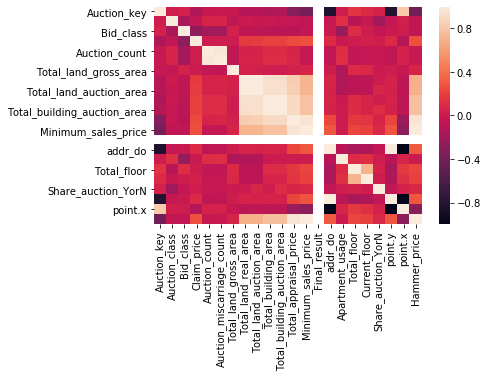

In [14]:
sns.heatmap(df.corr())
plt.show()

In [15]:
df[['Minimum_sales_price','Hammer_price']]

,Minimum_sales_price,Hammer_price
0,668800000,760000000
1,858400000,971889999
2,76160000,93399999
3,230720000,256899000
4,136000000,158660000
...,...,...
1928,401000000,402500000
1929,363200000,430234600
1930,1028000000,1118999990
1931,325600000,403000000


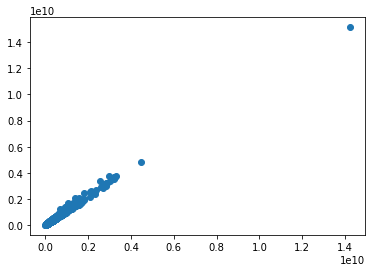

In [16]:
plt.scatter(x=df['Minimum_sales_price'],y=df['Hammer_price'])
plt.show()

# 3 - 데이터의 행렬 통해서 값 비교

In [86]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
model.score(X_train, y_train) #r-square

0.9912897934809027

In [88]:
y_pred = model.predict(X_test)

In [89]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

3093543454120739.0

In [90]:
print(model.coef_) #추정된 회귀계수(intercept제외) 베타들
print(model.intercept_) #intercept 베타0

[-1.18963593e+04  1.68029182e+06  1.20218534e+07  3.54112353e-03
 -2.01088663e+07  3.75767820e+07  2.09981623e+01  6.68354175e+05
 -8.76432095e+05 -2.24774129e+05  2.40524187e+04  6.35085028e-02
  1.04903550e+00  4.39584255e-07  2.66071947e+08 -1.98086967e+07
  5.84411317e+04 -3.23551911e+05  3.30839850e+07 -5.62251308e+07
  6.50811576e+07]
-6403781340.030304


In [91]:
model.predict(X_test)

array([4.28889973e+08, 9.59438599e+08, 1.94875157e+08, 3.15333853e+08,
       7.00738496e+08, 8.23662102e+07, 6.12640515e+08, 3.37431483e+08,
       9.53394756e+08, 4.14007505e+08, 5.86282368e+08, 1.99667735e+08,
       7.34482664e+08, 3.68822204e+08, 1.10764530e+08, 2.62653565e+08,
       9.78902454e+07, 1.59832590e+08, 8.53688897e+08, 1.29849530e+09,
       4.43237831e+08, 2.28105578e+08, 1.65947575e+09, 2.71728817e+08,
       1.63042242e+08, 1.52828558e+08, 5.95603578e+08, 1.01961519e+09,
       3.95878848e+08, 6.50496130e+07, 1.14612450e+09, 3.27624109e+08,
       3.45704954e+08, 6.71644681e+08, 6.14637789e+08, 3.28786221e+08,
       4.82204426e+08, 2.95066635e+08, 5.74699683e+08, 5.02630150e+08,
       9.74174263e+08, 7.12809629e+07, 3.07709129e+08, 2.83993961e+07,
       3.92455637e+08, 1.01849801e+09, 1.85298784e+08, 1.33624060e+09,
       4.46469590e+08, 3.36532114e+08, 8.10846620e+08, 9.45594593e+08,
       1.32034073e+08, 3.15383785e+08, 8.91385801e+08, 1.84574474e+08,
      

In [92]:
model.score(X_test,y_test) #큰 차이가 없음 (오버피팅이 안되고, 설명력이 높음을 알 수 있다.)

0.9847958609169086

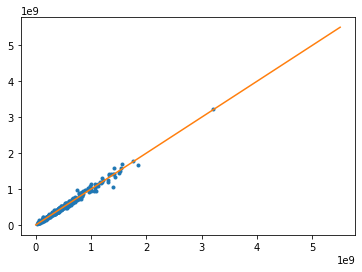

In [93]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0,1/2*(1e9+1e10))
y = x
plt.plot(x, y)
plt.show()

In [94]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\choi\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.45721e-22): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>

In [96]:
#R-square
ridge.score(X_train,y_train)

0.9912659948494027

In [97]:
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

C:\ProgramData\Anaconda3\envs\choi\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.07319e-22): result may not be accurate.
  overwrite_a=True).T


0.9912792941662498

In [98]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

C:\ProgramData\Anaconda3\envs\choi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3924644779422843e+18, tolerance: 5.490820647690412e+16
  positive)


0.9912855857377051

SECOND)

In [99]:
df.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_san', 'addr_etc', 'Apartment_usage',
       'Preserve_regist_date', 'Total_floor', 'Current_floor',
       'Share_auction_YorN', 'road_name', 'Close_date', 'Close_result',
       'point.y', 'point.x', 'Hammer_price'],
      dtype='object')

In [100]:
import statsmodels.api as sm

reg = sm.OLS.from_formula("Hammer_price ~ Minimum_sales_price ", df).fit()
reg.summary()


#P>|t| 의 값이 0에 가까울수록 유의미한 변수임을 알 수 있다.
#Intercept -> 베타0
#Minimum_sales_price -> 베타1 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hammer_price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.771e+05
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:54:05   Log-Likelihood:                -37293.
No. Observations:                1933   AIC:                         7.459e+04
Df Residuals:                    1931   BIC:                         7.460e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.463e+07   1.71e+06      8.559      0.000    1.13e+07     1.8e+07
Minimum_sales_price     1.1022      0.003    420.806      0.000       1.097       1.107
==============================================================================
Omnibus:                     1280.362   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52550.765
Skew:                           2.544   Prob(JB):                         0.00
Kurtosis:                      28.032   Cond. No.                     8.46e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""